In [1]:
import skimage.measure as measure
import numpy
import matplotlib.pyplot as plt

In [2]:
N = 1001

X,Z = numpy.meshgrid(numpy.linspace(-7.5,7.5,N),numpy.linspace(-7.5,7.5,N))

X = numpy.transpose(X)
Z = numpy.transpose(Z)

phi1 = 2.0 - numpy.sqrt((X+4)**2 + (Z+5)**2)
phi2 = 1.0 - numpy.sqrt((X-3)**2 + (Z-1)**2)

phi = numpy.maximum(phi1,phi2) 

bubble = measure.label(phi >= 0)

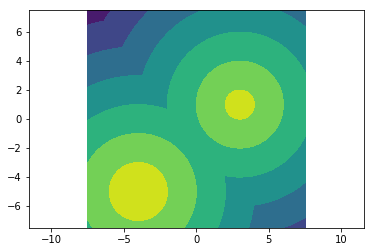

In [3]:
plt.contourf(X,Z,phi)
plt.axis('equal')
plt.show()

In [4]:
measurements = measure.regionprops_table(bubble, properties=('centroid',
                                                             'area',
                                                             'major_axis_length',
                                                             'minor_axis_length',
                                                             'perimeter'))

In [5]:
measurements

{'centroid-0': array([233, 700]),
 'centroid-1': array([166, 566]),
 'area': array([55828, 13963]),
 'major_axis_length': array([266.62710775, 133.3625974 ]),
 'minor_axis_length': array([266.59854728, 133.30711055]),
 'perimeter': array([879.57777721, 438.61731573])}

In [6]:
s = (N-1)/2
f = 15/(N-1)

bubblenum  = len(measurements['centroid-0'])
bubbledata = len(measurements)

bubbleprop = numpy.zeros((bubblenum,bubbledata), dtype=float)

#for thisbubble in range(bubblenum):
for thisbubble in range(bubblenum):
    bubbleprop[thisbubble,:] = numpy.array([(measurements['centroid-0'][thisbubble]-s)*f, 
                                           (measurements['centroid-1'][thisbubble]-s)*f,
                          measurements['area'][thisbubble]*f*f,
                          measurements['major_axis_length'][thisbubble]*f,
                          measurements['minor_axis_length'][thisbubble]*f,
                          measurements['perimeter'][thisbubble]*f])

In [7]:
bubbleprop

array([[-4.005     , -5.01      , 12.5613    ,  3.99940662,  3.99897821,
        13.19366666],
       [ 3.        ,  0.99      ,  3.141675  ,  2.00043896,  1.99960666,
         6.57925974]])

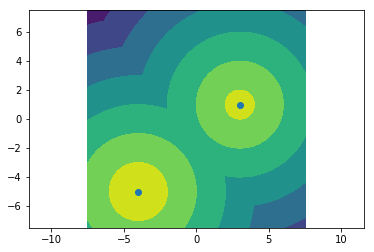

In [8]:
plt.contourf(X,Z,phi)
plt.scatter(bubbleprop[:,0],bubbleprop[0:,1])
plt.axis('equal')
plt.show()